<div style="text-align: center; margin: 50px">
<h1 style="color: darkblue; background-color: white; text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Gates, Measurement, & Circuits Pt. 1</h3>
<img src="https://raw.githubusercontent.com/Plabrum/qxq_hw/master/images/qubit_logo_doubleQ.png" style="width: 150px">
</div>

### Homework Instructions:

There are many questions on this notebook - we highly suggest you attempt every step of the activity to help you answer the canvas questions! 

Practice 1 and 2 will help reinforce what has been learned this week, Activities 1,2, and 3 will help answer the canvas questions.

## Homework overview 
#### Practice
1. Single Qubit Gates
    * [1a X Gate](#q1a)
    * [1b Y Gate](#q1b)
    * [1c Z Gate](#q1c)
    * [1d Hadamard & Rphi Gate](#q1d)
2. Single Qubit Circuit measurements
    * [2a Create a superposition](#q2a)
    * [2b Draw histogram](#q2b)

#### Activities
1. Multi Qubit States
    * [1a Statvectors](#q3a)
    * [1b Statvectors](#q3b)
2. Multi Qubit Gates 
    * [2a Using CNOT](#q4a)
    * [2b Draw histogram](#q4b)
    * [2c Creating a 2 qubit state](#q4c)
    * [2d Draw historgram](#q4d)
3. Bell States
    * [3a Phi- Circuit](#q5a)
    * [3b Phi- Histogram](#q5b)
    * [3c Psi+ Circuit](#q5c)
    * [3d Psi+ Histogram](#q5d)
    * [3e Psi- Circuit](#q5e)
    * [3f Psi- Histogram](#q5f)

In [1]:
# Import qiskit and call it q for short so we can construct,simulate, and run quantum circuits!
import qiskit as q
# Import Numpy and call it np so we can do maths!
import numpy as np
# Import the python plotting module of matplotlib and call it plt so we can draw graphs!
import matplotlib.pyplot as plt
# Tell matplotlib that we are in an Ipython notebook
%matplotlib inline

## How to use Qiskit!
The `QuantumCircuit` class is qiskit's way of designing a quanutm circuit, it takes two inputs: `qubtis` and `classical bits` which tell the circuit how many qubits and classical bits to use.

We can build a quantum circuit in qiskit with the following:
```
circ = QuantumCircuit(q,c)
```

In [2]:
# This creates a quantum circuit object
circ = q.QuantumCircuit(1,1)

### Drawing and Displaying Circuits

Qiskit has a function `circ.draw(output="mpl")` for drawing a diagram of circuits, to make sure the image is displayed in our IPython notebook we can use the `display()` function.

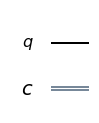

In [3]:
# This prints out a diagram of the circuit, the "mpl" makes it look pretty!
display(circ.draw(output="mpl"))

### Adding gates to a quantum circuit
This can be done by calling the `circ.gate(qubit)` command. 
Here the `gate` refers to the gate type, and the `qubit` refers to the qubit (or qubits) on which the gate is acting

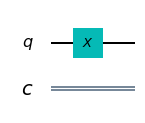

In [4]:
# Adding a NOT gate (aka an X gate) to qubit 0
circ.x(0)
display(circ.draw(output="mpl"))

<a id="q1a"></a>
# Practice: Implementing single qubit gates
## Single Qubit Gates

### *The X Gate* 
The X gate rotates the state vector by $\pi$ radians about the x-axis on the bloch sphere, it can be represented by the following matrix.
$$
 \begin{bmatrix}
  0 & 1 \\
  1 & 0
 \end{bmatrix}
$$

The syntax for an X gate is: `circ.x(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Step 1a:**
Initialize a new circuit and add an X gate to it, then draw it.

<a id="q1b"></a>

### *The Y Gate* 

The Y gate rotates the state vector by $\pi$ radians about the y-axis on the bloch sphere, it can be represented by the following matrix.
$$
 \begin{bmatrix}
  0 & -i \\
  i & 0
 \end{bmatrix}
$$

The syntax for a Y gate is: `circ.y(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Step 1b:**
Initialize a new circuit and add a Y gate to it, then draw it.

<a id="q1c"></a>
### The Z Gate

The Z gate rotates the state vector by $\pi$ radians about the z-axis on the bloch sphere, it can be represented by the following matrix.
$$
 \begin{bmatrix}
  1 & 0 \\
  0 & -1
 \end{bmatrix}
$$

The syntax for a Z gate is: `circ.z(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

**Step 1c:**
Initialize a new circuit and add a Z gate to it, then draw it.

<a id="q1d"></a>
### The Hadamard and $R_\phi$ Gates

The H gate allows us to create a superposition of the `0` and `1` state. It rotates the state vector about the line between the X and Z axis.

$$
 \frac{1}{\sqrt{2}}
 \begin{bmatrix}
  1 & 1 \\
  1 & -1
 \end{bmatrix}
$$

The syntax for an H gate is: `circ.h(target)` where `circ` is an initialized `QuantumCircuit` and `target` is the number of the qubit where you would like to apply the gate.

The $R_\phi$ gate allows us to rotate the state vector about the Z axis by an amount specified by $\phi$.

$$
 \frac{1}{\sqrt{2}}
 \begin{bmatrix}
  1 & 0 \\
  0 & e^{i \phi}
 \end{bmatrix}
$$

The syntax for an $R_\phi$ gate is: `circ.rz(angle,target)` where `circ` is an initialized `QuantumCircuit`, `angle` is amount the state vector is rotated around the Z axis and `target` is the number of the qubit where you would like to apply the gate. Similarily, we can rotate about the x and y axis using the `circ.rx(phi, 0)` and `circ.ry(phi, 0)` respectively.


**Step 1d:**
Initialize a new circuit and add an H gate and an Rz($\pi/2$,0) gate to it, then draw it.

<a id="q2a"></a>
# Practice 2: Single Qubit Circuit Measurements

In qiskit, circuits can be run on either real quantum computers or simulators. 

In order to run the circuit you need to create a backend, in this homework we will be using the `statevector` simulator - it calculates a simulation of an ideal quantum system and allows us to see the theoretical perfect outcomes of circuits.

The syntax for measurements is as follows:

**1. Initialize a backend:**

`backend = q.Aer.get_backend('statevector_simulator')`

**2. Create a job (this runs asynchronously)**

`job = q.execute(circ, backend)`

**3. Request the results (this changes the function back to synchronous)**

`result = job.result()`

**4. Change the result into counts (this allows for probability histograms)**

`counts = result.get_counts(circ)`

**5. Visualise the results in a histogram**

`graph = q.visualization.plot_histogram(counts)`

**6. Display the graph in our IPython notebook**

`display(graph)`

**Step 2a:** Create a circuit that puts a single qubit in a superposition of 0 and 1, then draw the circuit.

<a id="q2b"></a>
**Step 2b:** Simulate the circuit from part a and display the histogram.

## Activity 1: Multi Qubit States

Before we saw that a single classical bit can be described by one of two states: `0` or `1`, and that a single qubit can be described by two complex amplitudes: $|a \rangle = \alpha |0\rangle + \beta |1\rangle$.

Therefore, if two classical bits can be desribed by one of four states: `00` `01` `10` `11`, two quantum bits can be described by four complex amplitudes:

$$|a \rangle = \alpha_{00} |00\rangle + \alpha_{01} |01\rangle  +\alpha_{10} |10\rangle + \alpha_{11} |11\rangle$$

This is more easily represented using the statevector notation described above, so now our state is described with the following:
$$
|a \rangle = \begin{bmatrix} \alpha_{00} \\ \alpha_{01} \\ \alpha_{10} \\ \alpha_{11} \end{bmatrix}
$$

<a id="q3a"></a>
## Writing two qubit states
If $|a\rangle = |00\rangle$ can be written in statevector form as:
```
a = [1,0,0,0]
```
#### Step 1a: 
Write the state $$|b\rangle = 0.4 \cdot |00\rangle + 0.65 \cdot |01\rangle+0.21 \cdot |10\rangle + 0.61 \cdot |11\rangle$$
in statevector form.

<a id="3b"></a>
#### Step 1b: 
Write the state 

$$|b\rangle = 0.924 \cdot |00\rangle + 0.383 \cdot |11\rangle$$

in statevector form.

## Activity 2: Multi-qubit Gates

Now that we have been introduced to single qubit ciruits and gates, we can get to the fun stuff!

#### The CNOT Gate:

The CNOT gate can be used to entangle and disentangle a pair of qubits. The CNOT gate takes a `control` and `target` qubit, if the `control` qubit is in the $1$ state it applies a NOT (aka X) gate to the `target` qubit hence the C NOT (Controlled NOT) name. 
It can be represented by the following matrix:

$$
 \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
 \end{bmatrix}
$$

Check out these pages if you're interested in learning more! 
* [CNOT Gate](https://en.wikipedia.org/wiki/Controlled_NOT_gate)
* [EPR / Entangled Pairs](https://en.wikipedia.org/wiki/Quantum_entanglement)

<a id="q4a"></a>
**Step 2a:** Create a 2 qubit circuit with an H gate on the first qubit, and a CNOT gate with the first qubit as the control and the second as the target.

<a id="q4b"></a>
**Step 2b:** Create a backend to measure the state of this circuit and plot the histogram of state measurements.

<a id="q4c"></a>
**Step 2c:** Create a circuit that prepares the state:

$$
|b\rangle = 0.924 \cdot |00\rangle + 0.383 \cdot |11\rangle
$$

**Hint:** use the ry gate to rotate the vector

<a id="q4d"></a>

**Step 2d:** Now show the the histogram measurement for the circuit from question 4c

## Activity 3: Bell States

A Bell state describes the maximally entagled state of two qubits.

There are four Bell States:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle
$$

$$
| \Phi^- \rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle 
$$

$$   
| \Psi^+ \rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle
$$

$$
| \Psi^- \rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle
$$

We acutally already came across the $\Phi^+$ state earlier when we went through creating and measuring circuits:

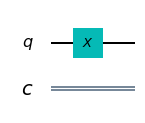

In [5]:
circ.draw(output="mpl")

This circuit creates a maximally entagled pair of qubits: the first qubit has a hadamard gate applied and the second has a controlled not gate applied. Therefore, if qubit $q_0$ is measured in the $|0\rangle$ state then qubit $q_1$ must also be in $|0\rangle$ state. 

<a id="q5a"></a>
**Step 3a:** Construct a circuit that represents the $\Phi^-$ Bell State.

<a id="q5b"></a>
**Step 3b:** Show that the qubits in 3a are maximally entangled by measuring and showing the ouput histograms.

<a id="q5c"></a>
**Step 3c:** Construct a circuit that represents the $\Psi^+$ Bell State.

<a id="q5d"></a>
**Step 3d:** Show that the qubits in 3c are maximally entangled by measuring and showing the ouput histograms.

<a id="q5e"></a>
**Step 3e:** Construct a circuit that represents the $\Psi^-$ Bell State.

<a id="q5f"></a>
**Step 3f:** Show that the qubits in 3e are maximally entangled by measuring and showing the ouput histograms.

### © 2020 The Coding School

**All rights reserved**

*Use of this activity is for personal use only. Copying, reproducing, distributing, posting or sharing this activity in any manner with any third party are prohibited under the terms of this registration. All rights not specifically licensed under the registration are reserved.*